# D6.2 Basic Waves

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D6.2.1 Motivation
Waves are one of the most fundamental and far-reaching concepts in physics. They describe how disturbances travel through space and time, carrying energy and information without the bulk transport of matter. From sound and light to earthquakes and water waves, understanding wave behavior is essential to explaining natural phenomena and developing modern technologies such as communication systems, medical imaging, and quantum mechanics. Waves connect many areas of physics and provide a unifying framework for understanding oscillatory and propagating motion.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D6.2.2 Oscillations vs. Waves
While oscillations describe the repetitive motion of a single system around an equilibrium point, **waves** occur when oscillations propagate through space. In other words:
- **Oscillation**: Localized motion (e.g., one mass on a spring).
- **Wave**: An oscillation that spreads through space, transmitting energy from one location to another.

This key distinction makes waves much richer: the motion is no longer confined to one particle or system, but instead involves interactions across space.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D6.2.3 Longitudinal vs. Transverse Waves
There are two primary types of mechanical waves, classified by the direction of oscillation relative to wave propagation:

1. **Longitudinal waves**  
   - The oscillations are **parallel** to the direction of wave travel.  
   - Example: sound waves in air, where compressions and rarefactions move along the same line as the wave’s motion.

2. **Transverse waves**  
   - The oscillations are **perpendicular** to the direction of wave travel.  
   - Example: waves on a string, where the string moves up and down while the disturbance travels horizontally.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D6.2.4 Wave Characteristics

1. **Wavelength ($\lambda$)**  
   The spatial length of one complete cycle of the wave — the distance between two consecutive crests, troughs, or compressions.  
   Units: meters (m).

2. **Wavenumber ($k$)**  
   A measure of how many wave cycles fit into a unit length.

   $$
   k = \frac{2\pi}{\lambda}
   $$

   Units: radians per meter.

4. **Frequency ($f$), Period ($T$), and Angular Frequency ($\omega$)**  
   These quantities come from the **oscillatory motion** that makes up the wave. At a fixed point in space, the medium oscillates with the same $f$, $T$, and $\omega$ as the source that generated the wave.  
   - **Frequency ($f$):** cycles per second (Hz).  
   - **Period ($T$):** time to complete one cycle (s).  
   - **Angular frequency ($\omega$):** rate of oscillation expressed in radians per second.  

   $$
   f = \frac{1}{T}, \qquad \omega = 2\pi f = \frac{2\pi}{T}
   $$  

   In this way, $f$, $T$, and $\omega$ describe the **temporal repetition** of the oscillations, while wavelength and wavenumber describe the **spatial repetition** of the wave. A full description of a wave needs both.

5. **Phase and Phase Speed ($v_p$)**  
   The **phase** of a wave specifies the position within a cycle at a given point in space and time. When we talk about *phase speed*, we mean the speed at which a particular point of constant phase (such as a crest) moves through space.  
   The phase speed relates temporal and spatial properties by:

   $$
   v_p = f \lambda = \frac{\omega}{k}
   $$

   Phase speed describes how the shape of the wave moves, not how matter moves.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D6.2.5 Phase and Pattern Interpretation

A wave is best understood as a **repeating pattern** that extends through space and evolves in time. The concept of **phase** provides a precise way to identify where a system is within that repeating pattern.

The phase of a wave specifies the **state of the oscillation** at a particular position and time. Two points are said to be **in phase** if they are at the same point in the oscillation cycle, even if they are located at different positions or observed at different times.

Importantly, *phase does not describe position alone*. Instead, it labels a point within the repeating pattern. For example, all crests of a wave share the same phase, as do all troughs, even though they occur at different locations.

A traveling wave can be written in the form

$$
y(x,t) = A\sin(kx - \omega t),
$$

where the quantity $(kx - \omega t)$ is the **phase**. Holding the phase constant corresponds to following a specific feature of the wave—such as a crest—as it moves through space. **This is why the phase speed $v_p$ describes the motion of the *pattern*, not the motion of individual particles in the medium**.

From this perspective, a traveling wave can be viewed as a collection of **successive oscillations**, each occurring at a different position, but all connected by a common phase structure that propagates through space.


In [5]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
from IPython.display import HTML, display

# -------------------------------------------------
# Settings (tune as needed)
# -------------------------------------------------
use_html5_video = True
fps = 30
duration = 8.0           # seconds (longer = slower feel, more time to watch)
interval_ms = 1000 / fps

mpl.rcParams["animation.embed_limit"] = 80  # MB

# -------------------------------------------------
# Wave parameters (Phase D: descriptive)
# -------------------------------------------------
A = 0.25          # amplitude (m)
lam = 1.0         # wavelength (m)
k = 2*np.pi / lam

f = 0.25          # Hz  <-- SLOW DOWN HERE (period = 4 s)
omega = 2*np.pi * f
vp = omega / k

# Domain
L = 3.0 * lam
x = np.linspace(0, L, 700)

# Fixed particle location
x0 = 0.75 * lam

# Longitudinal particles (equilibrium positions)
x_eq = np.linspace(0, L, 55)
y_row = np.zeros_like(x_eq)

# Time sampling
N = int(duration * fps)
t_vals = np.linspace(0, duration, N)

# Crest marker position (constant phase)
def x_phase(t):
    return (vp * t) % L

# -------------------------------------------------
# Figure with two panels
# -------------------------------------------------
fig, (axT, axL) = plt.subplots(2, 1, figsize=(10, 7), constrained_layout=True)

# ===== Transverse panel =====
axT.set_title("Transverse Wave: particle motion (up/down) vs. phase motion (crest moves right)")
axT.set_xlim(0, L)
axT.set_ylim(-1.5*A, 1.5*A)
axT.set_xlabel("Position $x$ (m)")
axT.set_ylabel("Displacement $y$ (m)")
axT.grid(True)

t_init = t_vals[0]
yT = A * np.cos(k*x - omega*t_init)
(lineT,) = axT.plot(x, yT, lw=2, label=r"$y(x,t)=A\cos(kx-\omega t)$")

y0 = A * np.cos(k*x0 - omega*t_init)
(particleT,) = axT.plot([x0], [y0], marker="o", markersize=10, label="One particle (fixed $x$)")

phase_line_T = axT.axvline(x_phase(t_init), lw=2, ls="--", label="Crest (constant phase)")
axT.legend(loc="upper right")

# ===== Longitudinal panel =====
axL.set_title("Longitudinal Wave: particle motion (back/forth) vs. phase motion (crest moves right)")
axL.set_xlim(0, L)
axL.set_ylim(-0.12, 0.12)
axL.set_xlabel("Position $x$ (m)")
axL.set_yticks([])
axL.grid(True, axis="x")

u = A * np.cos(k*x_eq - omega*t_init)
x_disp = x_eq + u

dots = axL.scatter(x_disp, y_row, s=30, label="Particles (positions)")
idx0 = np.argmin(np.abs(x_eq - x0))
highlight = axL.scatter([x_disp[idx0]], [0.0], s=120, marker="o", label="One particle (back/forth)")

phase_line_L = axL.axvline(x_phase(t_init), lw=2, ls="--", label="Crest (constant phase)")
axL.legend(loc="upper right")

# -------------------------------------------------
# Update
# -------------------------------------------------
def update(frame):
    t = t_vals[frame]

    # Transverse snapshot
    yT = A * np.cos(k*x - omega*t)
    lineT.set_ydata(yT)

    # Transverse particle at x0
    y0 = A * np.cos(k*x0 - omega*t)
    particleT.set_data([x0], [y0])

    # Crest marker
    xp = x_phase(t)
    phase_line_T.set_xdata([xp, xp])

    # Longitudinal particles
    u = A * np.cos(k*x_eq - omega*t)
    x_disp = x_eq + u
    dots.set_offsets(np.column_stack([x_disp, y_row]))
    highlight.set_offsets([[x_disp[idx0], 0.0]])

    # Crest marker
    phase_line_L.set_xdata([xp, xp])

    return lineT, particleT, phase_line_T, dots, highlight, phase_line_L

ani = animation.FuncAnimation(fig, update, frames=N, interval=interval_ms, blit=False)
plt.close(fig)

# -------------------------------------------------
# Display
# -------------------------------------------------
if use_html5_video:
    display(HTML(ani.to_html5_video()))
else:
    display(HTML(ani.to_jshtml()))


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D6.2.6 Interpreting Waves as Space–Time Descriptions

A key feature that distinguishes waves from simple oscillations is that wave motion depends on **both position and time**. A wave description therefore requires careful interpretation of *what is being held fixed* and *what is allowed to vary*.

When we write a wave in the form

$$
y(x,t) = A\sin(kx - \omega t),
$$

the variables $x$ and $t$ play different conceptual roles:

- Holding **position fixed** and allowing time to vary describes the **oscillatory motion of a single point in space**.
- Holding **time fixed** and allowing position to vary describes the **shape of the wave in space** at a particular instant.

These two perspectives describe the *same wave*, but they answer different physical questions.

From the oscillation viewpoint, each position in the medium behaves like its own oscillator, repeating in time with frequency $f$ and angular frequency $\omega$. From the wave viewpoint, those oscillations are arranged across space with a spatial repetition characterized by wavelength $\lambda$ and wavenumber $k$.

The phase,

$$
\text{phase} = kx - \omega t,
$$

provides a unifying description. Points with the same phase are in the same state of oscillation, even if they occur at different positions or times. In this sense, the phase acts as a **label for the repeating pattern**, allowing us to track features such as crests, troughs, or compressions as they propagate through space.

Understanding waves as **organized oscillations distributed across space** is essential before introducing graphical representations. Graphs of waves do not show particles moving through space; they show how the **state of oscillation** varies with position and time.

### Snapshot in Space: Holding Time Fixed

One useful way to understand a traveling wave is to take a **snapshot at a single instant in time** and examine how the disturbance varies across space.

Mathematically, this means we **hold time fixed** at some value $t = t_0$ and allow position $x$ to vary. When we do this, the wave expresses as

$$
y(x,t) = A\cos(kx - \omega t)
$$

becomes a function of position only:

$$
y(x,t_0) = A\cos(kx - \omega t_0).
$$

This expression describes the **shape of the wave in space** at the instant $t_0$. It does *not* describe motion through time. No particles are moving left or right in this plot; instead, the graph shows how different positions are displaced at the same moment.

In a spatial snapshot:
- The **horizontal axis** represents position $x$.
- The **vertical axis** represents displacement of the medium at that position.
- The **wavelength $\lambda$** appears as the distance over which the pattern repeats in space.

Successive crests, troughs, or any other points with the same phase are separated by one wavelength. In this way, wavelength plays the same role in space that period plays in time for oscillations.

The following figure shows such a spatial snapshot, with one full wavelength highlighted.


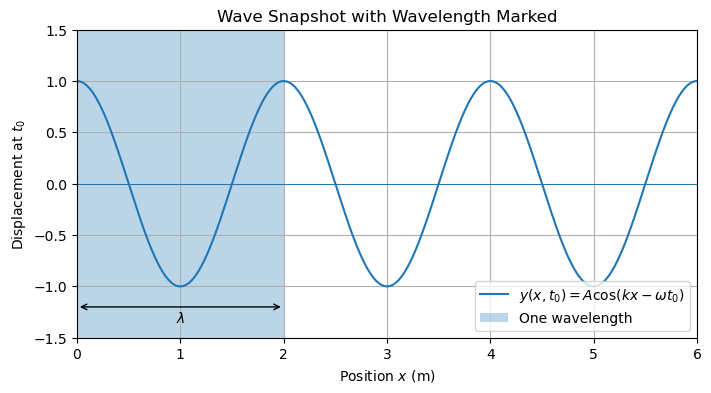

In [2]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0           # Amplitude
lam = 2.0         # Wavelength (meters)
k = 2*np.pi/lam   # Wavenumber
f = 1.0           # Frequency (Hz)
omega = 2*np.pi*f # Angular frequency
v_p = omega/k     # Phase speed (not needed for snapshot, but shown for completeness)

# Spatial domain and snapshot time
x = np.linspace(0, 3*lam, 1000)
t0 = 0.0
y = A * np.cos(k*x - omega*t0)

# Plot
plt.figure(figsize=(8,4))
plt.plot(x, y, label=r"$y(x,t_0)=A\cos(kx-\omega t_0)$")
plt.axhline(0, linewidth=0.7)

# Shade one full wavelength (0 to λ)
plt.axvspan(0, lam, alpha=0.3, label="One wavelength")

# Mark wavelength with a double arrow
y_arrow = -1.2
plt.annotate("", xy=(0, y_arrow), xytext=(lam, y_arrow),
             arrowprops=dict(arrowstyle="<->"))
plt.text(lam/2, y_arrow-0.15, r"$\lambda$", ha="center")

# Labels and legend
plt.xlabel("Position $x$ (m)")
plt.ylabel("Displacement at $t_0$")
plt.title("Wave Snapshot with Wavelength Marked")
plt.legend()
plt.ylim(-1.5, 1.5)
plt.xlim(0, 3*lam)
plt.grid(True)
plt.show()


### Oscillation in Time: Holding Position Fixed

Another equally important way to interpret a traveling wave is to focus on a **single position in space** and observe how the displacement changes with time.

In this case, we **hold position fixed** at some value $x = x_0$ and allow time $t$ to vary. Starting from the wave expressed as

$$
y(x,t) = A\cos(kx - \omega t),
$$

we obtain

$$
y(x_0,t) = A\cos(kx_0 - \omega t).
$$

This expression describes the **oscillatory motion at one specific location** as the wave passes through. The displacement at that point varies sinusoidally in time, just like the oscillations studied earlier in this module.

From the perspective of time dependence, the quantity $kx_0$ is simply a **constant**. It plays the same role as a **phase constant**, setting where in the oscillation cycle the motion begins at $t = 0$. Different positions $x_0$ therefore correspond to oscillations with the **same frequency** $\omega$, but with **different phase offsets**.

In this way, a traveling wave can be viewed as a collection of oscillators distributed across space. Each oscillator repeats with the same period $T$, but each starts its oscillation at a different point in the cycle depending on its position.

In a time-evolution view:
- The **horizontal axis** represents time $t$.
- The **vertical axis** represents the displacement at the fixed position $x_0$.
- The **period $T$** appears as the time required for the motion to repeat.

Although the wave itself propagates through space, this plot shows that **each position behaves like an oscillator in time**, with frequency $f$ and angular frequency $\omega$ determined by the source of the wave. The spatial structure of the wave is encoded in the position-dependent phase $kx_0$.

The following figure shows the oscillatory motion at a single fixed position as the wave passes by.


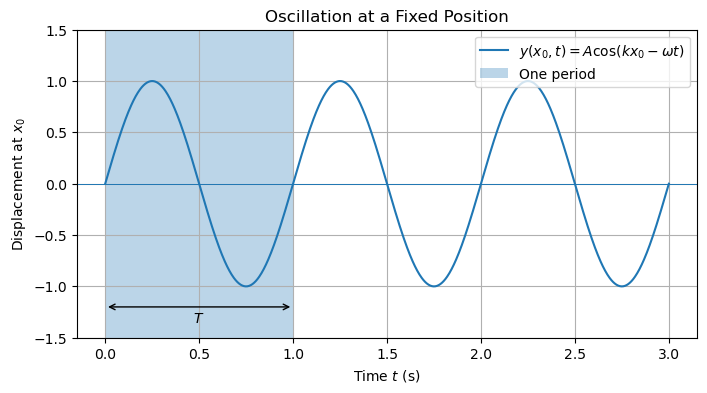

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0           # Amplitude
lam = 2.0         # Wavelength (meters)
k = 2*np.pi/lam   # Wavenumber
f = 1.0           # Frequency (Hz)
omega = 2*np.pi*f # Angular frequency

# Fixed position and time array
x0 = 0.5          # Fixed position (m)
T = 1/f           # Period
t = np.linspace(0, 3*T, 1000)

# Oscillation at fixed position
y = A * np.cos(k*x0 - omega*t)

# Plot
plt.figure(figsize=(8,4))
plt.plot(t, y, label=rf"$y(x_0,t)=A\cos(kx_0-\omega t)$")
plt.axhline(0, linewidth=0.7)

# Shade one full period (0 to T)
plt.axvspan(0, T, alpha=0.3, label="One period")

# Mark period with a double arrow
y_arrow = -1.2
plt.annotate("", xy=(0, y_arrow), xytext=(T, y_arrow),
             arrowprops=dict(arrowstyle="<->"))
plt.text(T/2, y_arrow-0.15, r"$T$", ha="center")

# Labels and legend
plt.xlabel("Time $t$ (s)")
plt.ylabel("Displacement at $x_0$")
plt.title("Oscillation at a Fixed Position")
plt.legend()
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div style="background-color:#e0f2f1; border-left:6px solid #00695c; padding:14px; border-radius:4px; margin-top:16px;">
<h3 style="margin-top:0; color:#000000;">Example — Oscillation at a Fixed Position in a Traveling Wave</h3>

A traveling wave along a string is described by

$$
y(x,t) = 0.40\cos(2\pi x - 4\pi t),
$$

where $x$ is in meters and $t$ is in seconds.

<br>

<strong>Interpretation</strong><br>

Consider the motion of the string at the fixed position

$$
x_0 = 0.25\,\text{m}.
$$

Substituting this value into the wave equation gives

$$
y(x_0,t) = 0.40\cos\!\big(2\pi(0.25) - 4\pi t\big)
= 0.40\cos\!\big(\tfrac{\pi}{2} - 4\pi t\big).
$$

This expression has the same form as a simple oscillation,

$$
y(t) = A\cos(\omega t + \phi),
$$

with:
- amplitude $A = 0.40\,\text{m}$,
- angular frequency $\omega = 4\pi\,\text{rad/s}$,
- phase constant $\phi = \tfrac{\pi}{2}$.

The term $kx_0 = \tfrac{\pi}{2}$ acts as a **phase offset**, determining where in the oscillation cycle the motion at $x_0$ begins at $t = 0$.

<br>

<strong>Key takeaway</strong><br>

At a fixed position, a traveling wave behaves like a **simple oscillator in time**.  
Different positions oscillate with the same frequency, but with **different phase constants** determined by their location.
</div>

---

<div style="background-color:#e0f2f1; border-left:6px solid #00695c; padding:14px; border-radius:4px; margin-top:16px;">
<h3 style="margin-top:0; color:#000000;">Example — Comparing Oscillations at Two Positions</h3>

A traveling wave is described by

$$
y(x,t) = 0.25\cos(3\pi x - 6\pi t),
$$

with $x$ in meters and $t$ in seconds.

<br>

<strong>Two fixed positions</strong><br>

Consider the oscillatory motion at the two positions

$$
x_1 = 0.00\,\text{m}, \qquad x_2 = \frac{1}{3}\,\text{m}.
$$

Substituting each position into the wave equation gives:

<br>

At $x_1 = 0$:

$$
y(x_1,t) = 0.25\cos(-6\pi t).
$$

At $x_2 = \tfrac{1}{3}$:

$$
y(x_2,t) = 0.25\cos\!\big(3\pi(\tfrac{1}{3}) - 6\pi t\big)
= 0.25\cos(\pi - 6\pi t).
$$

<br>

<strong>Phase interpretation</strong><br>

Both positions oscillate with the **same angular frequency** $\omega = 6\pi\,\text{rad/s}$ and the same amplitude.  
However, their **phase constants** are different:

- At $x_1$: $\phi_1 = 0$  
- At $x_2$: $\phi_2 = \pi$

This means the two oscillations are **out of phase by $\pi$ radians**, or half a cycle.

<br>

<strong>Physical meaning</strong><br>

When the displacement at $x_1$ is at a maximum, the displacement at $x_2$ is at a minimum. The two points oscillate in opposite directions at the same time.

<br>

<strong>Key takeaway</strong><br>

Different positions in a traveling wave oscillate with the same frequency but with **phase differences determined by their separation**. These phase differences encode the spatial structure of the wave.
</div>

---

<div style="background-color:#e0f2f1; border-left:6px solid #00695c; padding:14px; border-radius:4px; margin-top:16px;">
<h3 style="margin-top:0; color:#000000;">Example — Identifying Wave Parameters from a Wave Expression</h3>

A traveling wave is described by the equation

$$
y(x,t) = 0.15\cos(4\pi x - 2\pi t),
$$

where $x$ is measured in meters and $t$ is measured in seconds.

<br>

<strong>Identify the wave parameters</strong><br>

Compare the given expression to the standard traveling-wave form,

$$
y(x,t) = A\cos(kx - \omega t).
$$

From direct comparison, we identify:

<br>

- **Amplitude**

  $$
  A = 0.15\,\text{m}.
  $$

- **Wavenumber**

  $$
  k = 4\pi\,\text{rad/m}.
  $$

- **Angular frequency**

  $$
  \omega = 2\pi\,\text{rad/s}.
  $$

<br>

<strong>Derived quantities</strong><br>

The wavelength is related to the wavenumber by

$$
\lambda = \frac{2\pi}{k} = \frac{2\pi}{4\pi} = 0.50\,\text{m}.
$$

The frequency is related to the angular frequency by

$$
f = \frac{\omega}{2\pi} = 1.0\,\text{Hz}.
$$

The phase speed of the wave is therefore

$$
v_p = f\lambda = (1.0)(0.50) = 0.50\,\text{m/s}.
$$

<br>

<strong>Key takeaway</strong><br>

All essential properties of a traveling wave—its spatial repetition, temporal repetition, and propagation speed—can be identified directly from the coefficients of $x$ and $t$ in the wave expression.
</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 1 — Reading a Traveling Wave Equation</h3>

In this activity, you will practice identifying the **key characteristics of a traveling wave** directly from its mathematical expression.

<strong>Task:</strong>

A wave traveling along a string is described by

$$
y(x,t) = 0.20\sin(6\pi x - 3\pi t),
$$

where $x$ is measured in meters and $t$ is measured in seconds.

Answer the following questions.

1. Identify the **amplitude** of the wave.  
2. Identify the **wavenumber** $k$ and the **angular frequency** $\omega$.  
3. Determine the **wavelength** $\lambda$ and the **frequency** $f$.  
4. Determine the **phase speed** $v_p$ of the wave.  
5. Explain, in words, what information is encoded in the terms involving $x$ and $t$.

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
A Possible Solution Guide
</summary>

<strong>Key idea</strong>

Compare the given expression to the standard form

$$
y(x,t) = A\sin(kx - \omega t).
$$

<br>

<strong>Step 1: Amplitude</strong>

The coefficient in front of the sine function gives the amplitude:

$$
A = 0.20\,\text{m}.
$$

<br>

<strong>Step 2: Wavenumber and angular frequency</strong>

From direct comparison,

$$
k = 6\pi\,\text{rad/m}, \qquad \omega = 3\pi\,\text{rad/s}.
$$

<br>

<strong>Step 3: Wavelength and frequency</strong>

The wavelength is related to the wavenumber by

$$
\lambda = \frac{2\pi}{k} = \frac{2\pi}{6\pi} = \frac{1}{3}\,\text{m}.
$$

The frequency is related to the angular frequency by

$$
f = \frac{\omega}{2\pi} = \frac{3\pi}{2\pi} = 1.5\,\text{Hz}.
$$

<br>

<strong>Step 4: Phase speed</strong>

The phase speed is

$$
v_p = f\lambda = (1.5)\left(\frac{1}{3}\right) = 0.50\,\text{m/s}.
$$

<br>

<strong>Step 5: Interpretation</strong>

The term involving $x$ determines how the wave **repeats in space**, setting the wavelength.  
The term involving $t$ determines how the wave **repeats in time**, setting the frequency.

Together, these terms describe a repeating pattern that propagates through space.
</details>

</div>


<hr style="height:2px;border-width:0;color:gray;background-color:gray">